           Car       Model  Volume  Weight  CO2
0       Toyoty        Aygo    1000     790   99
1   Mitsubishi  Space Star    1200    1160   95
2        Skoda      Citigo    1000     929   95
3         Fiat         500     900     865   90
4         Mini      Cooper    1500    1140  105
5           VW         Up!    1000     929  105
6        Skoda       Fabia    1400    1109   90
7     Mercedes     A-Class    1500    1365   92
8         Ford      Fiesta    1500    1112   98
9         Audi          A1    1600    1150   99
10     Hyundai         I20    1100     980   99
11      Suzuki       Swift    1300     990  101
12        Ford      Fiesta    1000    1112   99
13       Honda       Civic    1600    1252   94
14      Hundai         I30    1600    1326   97
15        Opel       Astra    1600    1330   97
16         BMW           1    1600    1365   99
17       Mazda           3    2200    1280  104
18       Skoda       Rapid    1600    1119  104
19        Ford       Focus    2000    13

c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


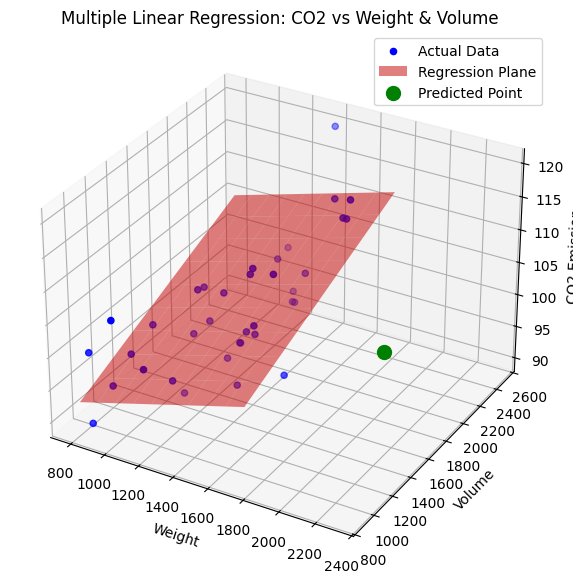

238.73737443185826


In [5]:
import pandas as pd
from sklearn import linear_model
import numpy as np

df = pd.read_csv("cars_data.csv")
print(df.to_string())

X = df[['Weight', 'Volume']]
y = df['CO2']

# using sklearn to be able to predict new data from already given data to predict a new set of data

regr = linear_model.LinearRegression()
regr.fit(X,y)

#predict the CO2 emission of a car where the weight is 2300kg, and the volume is 1300cm3:
predictedCO2 = regr.predict([[2300, 1300]])

print("The predicted CO2 value for the new car of weight 2300kg and volume 1300cm^3 is:",predictedCO2)

#VISUALIZATION
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Actual data points
ax.scatter(df['Weight'], df['Volume'], df['CO2'], color='blue', label='Actual Data')

# Create a grid for the regression plane
weight_range = np.linspace(df['Weight'].min(), df['Weight'].max(), 10)
volume_range = np.linspace(df['Volume'].min(), df['Volume'].max(), 10)
weight_grid, volume_grid = np.meshgrid(weight_range, volume_range)
co2_grid = regr.predict(np.c_[weight_grid.ravel(), volume_grid.ravel()]).reshape(weight_grid.shape)

# Plot regression plane
ax.plot_surface(weight_grid, volume_grid, co2_grid, alpha=0.5, color='red', label='Regression Plane')

# Predicted point
ax.scatter(2300, 1300, predictedCO2, color='green', s=100, label='Predicted Point')

# Labels
ax.set_xlabel('Weight')
ax.set_ylabel('Volume')
ax.set_zlabel('CO2 Emission')
ax.set_title('Multiple Linear Regression: CO2 vs Weight & Volume')

plt.legend()
plt.show()

sd_of_weight =np.std(df['Weight'])
print(sd_of_weight)

In [ ]:
#SCALING ; RESIZING DATA SO THEY HAVE SIMILAR RANGES OR PUTTING DATA INTO COMPARABLE VALUES
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
df = pd.read_csv("cars_data.csv")
X = df[['weight','volume']]
scaledX = scale.fit_transform(X)
print(scaledX)

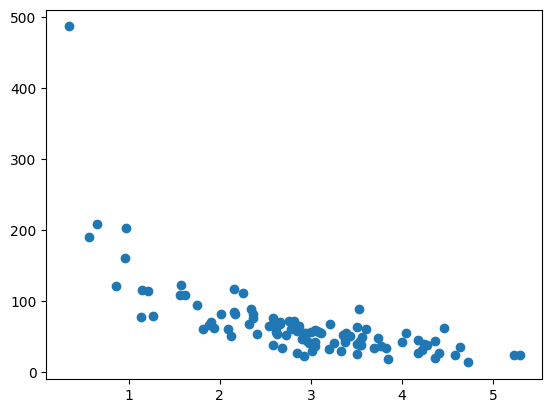

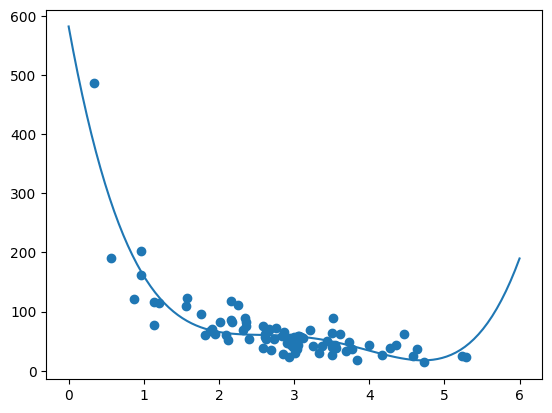

In [11]:
# TRAIN/ TEST
import numpy
import matplotlib.pyplot as plt
numpy.random.seed(2)

x = numpy.random.normal(3, 1, 100)
y = numpy.random.normal(150, 40, 100) / x

plt.scatter(x, y)
plt.show()

#TRAINING AND TESTING THE DATA SET
train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

#VISUALIZATION
"""
plt.scatter(train_x, train_y)
plt.show()

plt.scatter(test_x, test_y)
plt.show()
"""

mymodel =numpy.poly1d(numpy.polyfit(train_x, train_y, 4))

myline = numpy.linspace(0, 6, 100)

plt.scatter(train_x, train_y)
plt.plot(myline, mymodel(myline))
plt.show()

0.7988645544629797
0.8086921460343581


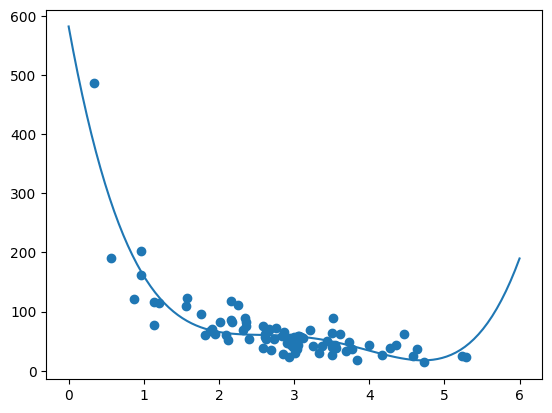

10668.566758263798


In [15]:
# R2 SQUARED
import numpy
from sklearn.metrics import r2_score
numpy.random.seed(2)

x = numpy.random.normal(3, 1, 100)
y = numpy.random.normal(150, 40, 100) / x

train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

mymodel = numpy.poly1d(numpy.polyfit(train_x, train_y, 4))

r2_train = r2_score(train_y, mymodel(train_x)) #x is the data i trained to predict the outcome of y
r2_test = r2_score(test_y, mymodel(test_x))

print(r2_train)
print(r2_test)

import matplotlib.pyplot as plt

myline = numpy.linspace(0, 6, 100)

plt.scatter(train_x, train_y)
plt.plot(myline, mymodel(myline))
plt.show()

print(mymodel(10))

    Age  Experience  Rank Nationality   Go
0    36          10     9          UK   NO
1    42          12     4         USA   NO
2    23           4     6           N   NO
3    52           4     4         USA   NO
4    43          21     8         USA  YES
5    44          14     5          UK   NO
6    66           3     7           N  YES
7    35          14     9          UK  YES
8    52          13     7           N  YES
9    35           5     9           N  YES
10   24           3     5         USA   NO
11   18           3     7          UK  YES
12   45           9     9          UK  YES


[Text(0.2857142857142857, 0.9, 'Rank <= 6.5\ngini = 0.497\nsamples = 13\nvalue = [6, 7]'),
 Text(0.14285714285714285, 0.7, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.21428571428571427, 0.8, 'True  '),
 Text(0.42857142857142855, 0.7, 'Rank <= 8.5\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.3571428571428571, 0.8, '  False'),
 Text(0.2857142857142857, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5714285714285714, 0.5, 'Age <= 35.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.42857142857142855, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.7142857142857143, 0.3, 'Experience <= 9.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5714285714285714, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8571428571428571, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

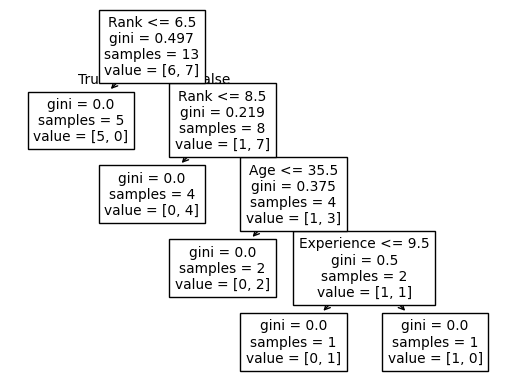

In [22]:
# DECISION TREE

import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv('data_concert.csv')
print(df)
d = {'UK': 0,'USA':1,'N':2}
df['Nationality'] = df['Nationality'].map(d)

d = {'YES':1,'NO':0}
df['Go'] = df['Go'].map(d)

features = ['Age', 'Experience', 'Rank', 'Nationality']

X = df[features]
y = df['Go']

dtree = DecisionTreeClassifier()
dtree_fit = dtree.fit(X, y)

tree.plot_tree(dtree_fit, feature_names=features)



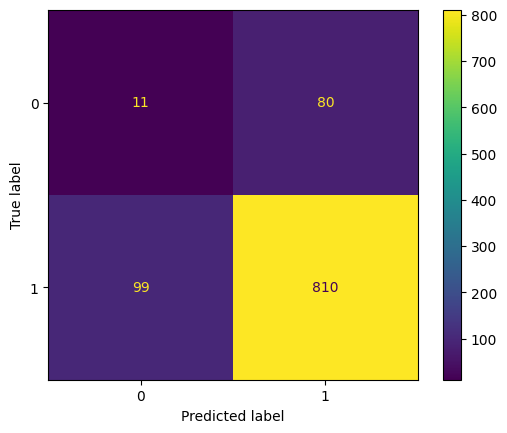

In [ ]:
# CONFUSION MATRIX
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

Accuracy = metrics.accuracy_score(actual, predicted)
Precision = metrics.precision_score(actual, predicted)
Sensitivity_recall = metrics.recall_score(actual, predicted)

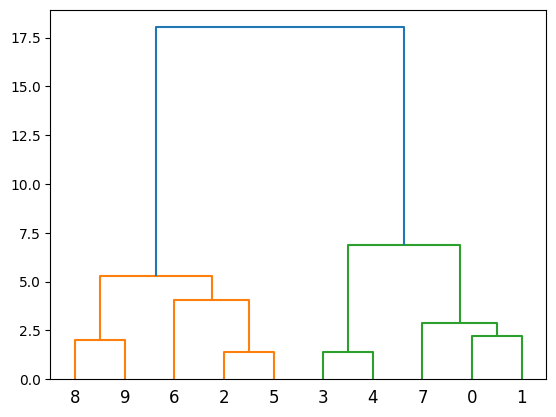

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

data = list(zip(x, y))

linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data)

plt.show()

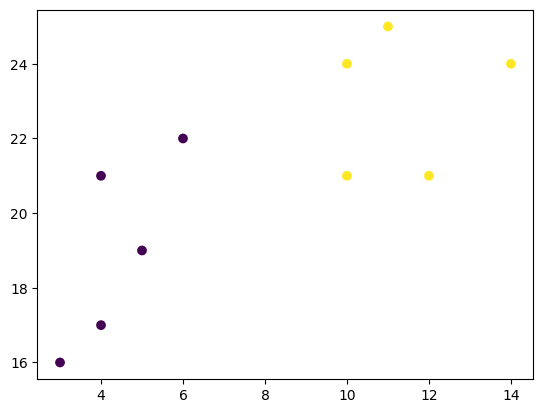

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

data = list(zip(x, y))

hierarchical_cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(data)

plt.scatter(x, y, c=labels)
plt.show()

In [1]:
import numpy
from sklearn import linear_model

#Reshaped for Logistic function.
X = numpy.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88])
X = X.reshape(-1,1)
y = numpy.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

logr = linear_model.LogisticRegression()
logr.fit(X,y)

#predict if tumor is cancerous where the size is 3.46mm:
predicted = logr.predict(numpy.array([3.46]).reshape(-1,1))
print(predicted)

[0]


In [ ]:
# ONE HOT ENCODING
import pandas as pd
cars = pd.read_csv('cars_data.csv')
#print(cars)
ohe_cars = pd.get_dummies(cars['Car'],dtype=int)
#print(ohe_cars.to_string())

X = pd.concat(cars[['Volume','weight'],ohe_cars],axis=1)
y = cars['CO2']
regr = linear_model.LinearRegression()
regr.fit(X,y)

##predict the CO2 emission of a VW where the weight is 2300kg, and the volume is 1300cm3:
predictedCO2 = regr.predict([[2300, 1300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]])

print(predictedCO2)


           Car       Model  Volume  Weight  CO2
0       Toyoty        Aygo    1000     790   99
1   Mitsubishi  Space Star    1200    1160   95
2        Skoda      Citigo    1000     929   95
3         Fiat         500     900     865   90
4         Mini      Cooper    1500    1140  105
5           VW         Up!    1000     929  105
6        Skoda       Fabia    1400    1109   90
7     Mercedes     A-Class    1500    1365   92
8         Ford      Fiesta    1500    1112   98
9         Audi          A1    1600    1150   99
10     Hyundai         I20    1100     980   99
11      Suzuki       Swift    1300     990  101
12        Ford      Fiesta    1000    1112   99
13       Honda       Civic    1600    1252   94
14      Hundai         I30    1600    1326   97
15        Opel       Astra    1600    1330   97
16         BMW           1    1600    1365   99
17       Mazda           3    2200    1280  104
18       Skoda       Rapid    1600    1119  104
19        Ford       Focus    2000    13

In [ ]:
# K-MEANS CLUSTERING
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

data = list(zip(x, y))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()